In [1]:
import pandas as pd
import folium as fm
import geopandas as gpd
import networkx as nx
import osmnx as ox

In [2]:
pwd()

'/home/jovyan/work/notebooks/2021-HELINA-COVID19-OSMNx-Workshop'

In [3]:
# read in csv file for parish centroids to health facility origin to destination pairs.. 
pairsdf = pd.read_csv ('parish-centroids-to-covid-testing-facility-pairs.csv')

In [4]:
pairsdf

,PAIRID,ORGDESTID,ORGID,DName2016,CName2016,SName2016,PName2016,LAT,LON,DESTID,FACILITY,CITY,ADDRESS,LAT.1,LON.1,COORDINATES,NOTES
0,1,1-1,1,KAMPALA,KAMPALA CAPITAL CITY,KAWEMPE,MPERERWE,0.398191,32.576832,1,Uganda Virus Research Insitute,Entebbe,"51/59 Nakiwogo Rd, Entebbe, Uganda",0.075898,32.457466,"0.07589818688171864, 32.45746567116031",NaN
1,2,1-2,1,KAMPALA,KAMPALA CAPITAL CITY,KAWEMPE,MPERERWE,0.398191,32.576832,2,Central Public Health Laboratory,Kampala,"7/11, Plot 113 Buganda Rd, Kampala, Uganda",0.331246,32.576171,"0.331245631028126, 32.57617147103373",NaN
2,3,1-3,1,KAMPALA,KAMPALA CAPITAL CITY,KAWEMPE,MPERERWE,0.398191,32.576832,3,Infectious Disease Institute Laboratory,Kampala,"P.O.Box 22418, Kampala, Uganda",0.339155,32.576119,"0.3391550027171229, 32.57611913788221",NaN
3,4,1-4,1,KAMPALA,KAMPALA CAPITAL CITY,KAWEMPE,MPERERWE,0.398191,32.576832,4,Makerere University,Kampala,"University Rd, Kampala, Uganda",0.333766,32.567515,"0.33376643025242, 32.56751532874441",NaN
4,5,1-5,1,KAMPALA,KAMPALA CAPITAL CITY,KAWEMPE,MPERERWE,0.398191,32.576832,5,Mild May Laboratory,Kampala,"6HG2+QJH, Kampala, Uganda",0.227261,32.551494,"0.22726149143899727, 32.551493611083714",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2108,96-18,96,KAMPALA,KAMPALA CAPITAL CITY,KAWEMPE,MAKERERE III,0.353028,32.566702,18,Rakai Health Sciences,Kalisizo,"Masaka - Kakuto Rd, Kalisizo, Uganda",-0.538277,31.621839,"-0.5382766032727377, 31.621838828618166",NaN
2108,2109,96-19,96,KAMPALA,KAMPALA CAPITAL CITY,KAWEMPE,MAKERERE III,0.353028,32.566702,19,TestXpress Laboratories,Entebbe,"Plot 168 Kampala Road, Entebbe, Uganda",0.059894,32.462367,"0.05989437682766108, 32.4623670709331",NaN
2109,2110,96-20,96,KAMPALA,KAMPALA CAPITAL CITY,KAWEMPE,MAKERERE III,0.353028,32.566702,20,Lancet Laboratories,Kampala,"Plot 1 Kyadondo road, Kampala, Uganda",0.288350,32.559739,"0.2883501600495953, 32.55973909986086",NaN
2110,2111,96-21,96,KAMPALA,KAMPALA CAPITAL CITY,KAWEMPE,MAKERERE III,0.353028,32.566702,21,ATCG Laboratories,Kampala,"Plot M219 Nakawa Industrial Area, Inside UIRI,...",0.337891,32.625401,"0.33789097348845115, 32.62540110209415",NaN


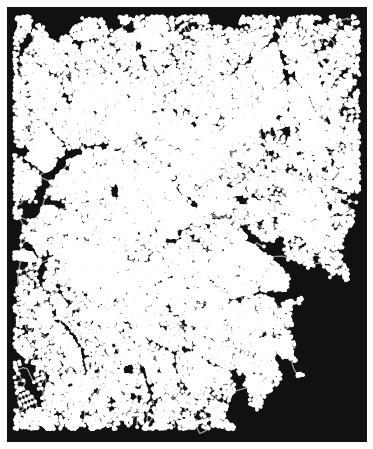

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
# get the Kampala OSM roads / network graph
ox.config(use_cache=True, log_console=True)
Kampala_all = ox.graph_from_bbox(0.408513, 0.218915, 32.666921, 32.509538, network_type='all')
Kampala_projected_all = ox.project_graph(Kampala_all)
ox.plot_graph(Kampala_projected_all)

In [6]:
# save street network as GraphML file (projected)
ox.save_graphml(Kampala_projected_all, 'Kampala_projected_all.graphml')

# save street network as GraphML file (unprojected)
ox.save_graphml(Kampala_all, 'Kampala_all.graphml')

In [7]:
#load the graphml (projected)
Kampala_projected_all2 = ox.load_graphml('Kampala_projected_all.graphml')

#load the graphml (unprojected)
Kampala_all2 = ox.load_graphml('Kampala_all.graphml')

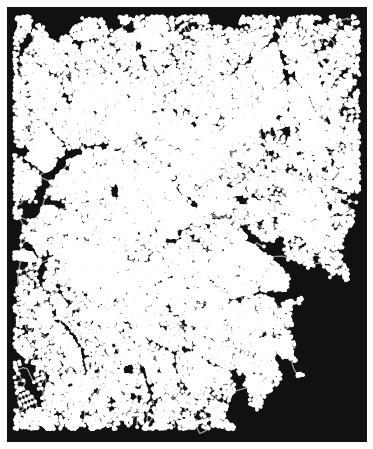

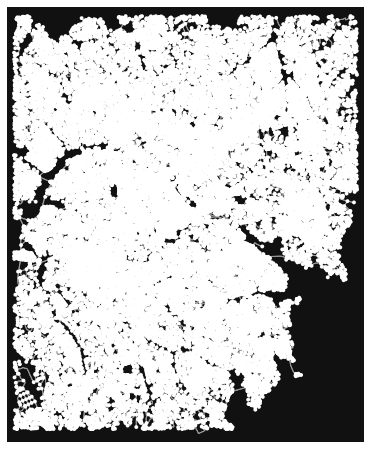

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [8]:
# plot the graphml (projected)
ox.plot_graph(Kampala_projected_all2)

#plot the graphml (unprojected)
ox.plot_graph(Kampala_all2)

In [9]:
# for speed purposes
MAX_RECORDS = 3000

In [10]:
from decimal import Decimal

In [11]:
# this is a class to establish font colors for labeling
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#print (color.BOLD + 'Hello World !' + color.END, end= ' ')
#print ('test')

In [12]:
for each in pairsdf[1:10].iterrows():
    orig_point = ((each[1]['LAT'], each[1]['LON']))
    dest_point = ((each[1]['FACLAT'], each[1]['FACLON'])) 
    
    orig_node = ox.get_nearest_node(Kampala_projected_all2, orig_point)
    dest_node = ox.get_nearest_node(Kampala_projected_all2, dest_point)
    
    
    
    #orig_node = ox.get_nearest_nodes(Kampala_projected_all2, (each[1]['LAT'], each[1]['LON']))
    #dest_node = ox.get_nearest_nodes(Kampala_projected_all2, (each[1]['FACLAT'], each[1]['FACLON'])) 
    
    route = nx.shortest_path(Kampala_projected_all2, orig_node, dest_node, weight='length')  
    fig, ax = ox.plot_graph_route(Kampala_projected_all2, route, node_size=0)
    
    MHDIST = nx.shortest_path_length(Kampala_projected_all2, orig_node, dest_node, weight='length')
    #EUCDIST = ox.great_circle_vec(Kampala_projected_all2.node[orig_node]['y'], Kampala_projected_all2.node[orig_node]['x'], Kampala_projected_all2.node[dest_node]['y'], Kampala_projected_all2.node[dest_node]['x'])
    EUCDIST = ox.distance.euclidean_dist_vec(Kampala_projected_all2.nodes[orig_node]['y'], Kampala_projected_all2.nodes[orig_node]['x'], Kampala_projected_all2.nodes[dest_node]['y'], Kampala_projected_all2.nodes[dest_node]['x'])
        
    decMHDIST = Decimal(MHDIST)
    decEUCDIST = Decimal(EUCDIST)
    
    outMHDIST = round(decMHDIST,1)
    outEUCDIST = round(decEUCDIST,1)
    
    print (color.BOLD + 'Parish Centroid: ' + color.END, end=' ')
    print(each[1]['PName2016'])
    print(color.BOLD + 'Covid-Testing Facility: ' + color.END, end=' ')
    print(each[1]['FACILITY'])
    print(color.BOLD + 'Manhattan Distance(meters) : ' + color.END, end=' ')
    print(outMHDIST)
    #print(decMHDIST)
    print(color.BOLD + 'Euclidean Distance(meters) : ' + color.END, end=' ')
    print(outEUCDIST)
    #print(decEUCDIST)

KeyError: 'FACLAT'